In [75]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
train_data = pd.read_csv("/resources/data/kdd/project/data/fiveclasses_train.csv")
train_data.shape

(86751, 7)

In [34]:
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,37,108546,1,4.082000e+03,-1,PRODUCE,4020
1,38,154356,1,3.800000e+09,1,GROCERY DRY GOODS,3555
2,36,80296,3,8.410580e+10,1,PERSONAL CARE,1410
3,37,168408,4,6.701522e+10,1,GROCERY DRY GOODS,2652
4,3,96861,6,6.811316e+10,1,FINANCIAL SERVICES,275


In [35]:
#print train_data.count()

train_data=train_data.dropna()
#print train_data.count()
#print train_data.T.apply(lambda x: x.nunique(),axis=1)

In [36]:
train, test = train_test_split(train_data, test_size = 0.2)
test=test.dropna()
train=train.dropna()
train_data = train
train_data.describe()

,TripType,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber
count,69400.000000,69400.000000,69400.000000,6.940000e+04,69400.000000,69400.000000
mean,31.598732,97247.483141,4.325720,2.323608e+10,1.133602,3719.621744
std,12.279161,55761.582885,2.080465,5.283062e+10,0.617861,2708.539332
min,3.000000,43.000000,1.000000,3.035000e+03,-9.000000,0.000000
25%,36.000000,49348.000000,2.000000,3.320017e+09,1.000000,1407.000000
50%,37.000000,98340.000000,5.000000,7.056084e+09,1.000000,3523.000000
75%,38.000000,146422.000000,6.000000,3.029939e+10,1.000000,5501.000000
max,38.000000,191337.000000,7.000000,9.780000e+11,31.000000,9998.000000


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
walmart_rf = RandomForestClassifier(n_estimators=100)

In [40]:
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
26317,36,16800,7,3.500076e+09,2,PERSONAL CARE,211
55042,5,38163,4,2.200001e+09,1,IMPULSE MERCHANDISE,135
36687,37,66732,1,7.874202e+09,1,DSD GROCERY,9249
65758,37,189259,7,2.840000e+09,1,DSD GROCERY,3663
35025,38,60179,7,3.663201e+09,1,DAIRY,1345


In [41]:
train_edit = train_data[["VisitNumber","Weekday","Upc","ScanCount","DepartmentDescription","FinelineNumber","TripType"]]

In [42]:
from sklearn import preprocessing

In [43]:
le_DD = preprocessing.LabelEncoder()

In [44]:
train_edit.DepartmentDescription = le_DD.fit_transform(train_edit.DepartmentDescription)

In [45]:
le_Days = preprocessing.LabelEncoder()

In [46]:
train_edit.Weekday = le_Days.fit_transform(train_edit.Weekday)

In [64]:
walmart_rf = walmart_rf.fit(train_edit[["VisitNumber", "Weekday", "Upc","ScanCount","DepartmentDescription","FinelineNumber"] ],train_edit["TripType"])

In [48]:
test_edit = test

In [49]:
le_DD_test = preprocessing.LabelEncoder()
test_edit.DepartmentDescription = le_DD_test.fit_transform(test_edit.DepartmentDescription)

In [50]:
le_Days_test = preprocessing.LabelEncoder()
test_edit.Weekday = le_Days_test.fit_transform(test_edit.Weekday)

In [65]:
output = walmart_rf.predict(test_edit[["VisitNumber", "Weekday", "Upc","ScanCount","DepartmentDescription","FinelineNumber"]])

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
accuracy_score(test_edit["TripType"], output)

0.54774940925595061

In [78]:
print(walmart_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [72]:
confusion_matrix(test_edit["TripType"], output)

array([[ 953,    9,   48,   52,   30],
       [  10,  227, 1033,  237,  251],
       [  23,  410, 2265,  469,  352],
       [  17,  844,  595, 3387, 1463],
       [  19,  286,  379, 1320, 2672]])

In [74]:
pd.crosstab(test_edit["TripType"], output, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,5,36,37,38,All
True,,,,,,
3,953,9,48,52,30,1092
5,10,227,1033,237,251,1758
36,23,410,2265,469,352,3519
37,17,844,595,3387,1463,6306
38,19,286,379,1320,2672,4676
All,1022,1776,4320,5465,4768,17351


In [83]:
print(classification_report(test_edit["TripType"], output))

             precision    recall  f1-score   support

          3       0.93      0.87      0.90      1092
          5       0.13      0.13      0.13      1758
         36       0.52      0.64      0.58      3519
         37       0.62      0.54      0.58      6306
         38       0.56      0.57      0.57      4676

avg / total       0.55      0.55      0.55     17351



In [67]:
importances = walmart_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in walmart_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_edit.shape[1]-1):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 0 (0.278480)
2. feature 4 (0.238633)
3. feature 2 (0.209833)
4. feature 5 (0.202167)
5. feature 1 (0.052749)
6. feature 3 (0.018138)


In [68]:
train_edit.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
26317,16800,6,3.500076e+09,2,49,211,36
55042,38163,3,2.200001e+09,1,32,135,5
36687,66732,0,7.874202e+09,1,17,9249,37
65758,189259,6,2.840000e+09,1,17,3663,37
35025,60179,6,3.663201e+09,1,16,1345,38


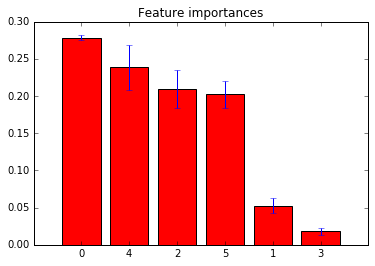

In [69]:
from matplotlib import pyplot as plt
%matplotlib inline
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_edit.shape[1]-1), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_edit.shape[1]-1), indices)
plt.xlim([-1, train_edit.shape[1]-1])
plt.show()